# Supervised Learning - Support Vector Machines

In [5]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

## Load dataset

In [8]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



## Dataset keys and attributes

In [11]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [25]:
print(faces.images.shape, faces.target.shape, faces.data.shape)

(400, 64, 64) (400,) (400, 4096)


In [19]:
print(np.min(faces.data), np.max(faces.data), np.mean(faces.data))

0.0 1.0 0.5470426


## A helper fuction

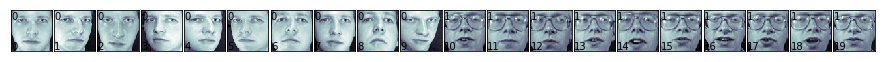

In [23]:
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(0, top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
print_faces(faces.images, faces.target, 20)

## Preprocessing

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, shuffle=True,
                                                    test_size=0.25, random_state=13)

## A function to evaluate K-fold cross-validation

In [57]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

from scipy.stats import sem
def evaluate_cross_validation(classifier, X, y, K):
    cv = KFold(n_splits=K, random_state=13, shuffle=True)
    scores = cross_val_score(classifier, X, y, cv=cv.split(X))
    print(scores)
    print('Mean scores: {0:.3f} (+/-){1:.3f}'.format(np.mean(scores), sem(scores)))

## Support Vector Classifier

In [58]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.98333333 0.96666667 0.95       0.9        0.93333333]
Mean scores: 0.947 (+/-)0.014


## Evaluating the perfomance on the testing set

In [67]:
from sklearn import metrics

def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    
    print('Accuracy on training set:')
    print(classifier.score(X_train, y_train))
    print('Accuracy on testing set:')
    print(classifier.score(X_test, y_test))
    
    y_pred = classifier.predict(X_test)
    
    print('Classification report:')
    print(metrics.classification_report(y_test, y_pred))
    print('Confusion matrix:')
    print(metrics.confusion_matrix(y_test, y_pred))
    
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.96
Classification report:
             precision    recall  f1-score   support

          0       0.67      1.00      0.80         2
          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         2
          3       0.67      1.00      0.80         2
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         3
          6       1.00      1.00      1.00         5
          7       1.00      0.75      0.86         4
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         6
         11       1.00      1.00      1.00         5
         12       1.00      0.50      0.67         2
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         3
         16    

## With or without glasses?

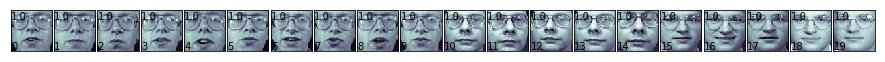

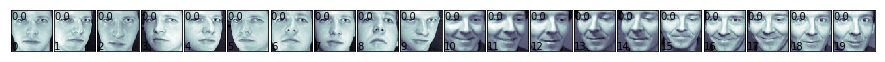

In [83]:
# the index ranges of images of people with glasses
glasses = [(10, 19), (30, 32), (37, 38), (50, 59), (63, 64), (69, 69), (120, 121), (124, 129),
          (130, 139), (160, 161), (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
          (194, 194), (196, 199), (260, 269), (270, 279), (300, 309), (330, 339), (358, 379),
          (330, 339), (358, 359), (360, 369)]
# preprocessing
def create_target(segments):
    # create a new array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in glasses:
        y[start:end+1] = 1
    return y
y_target = create_target(glasses)
X_train, X_test, y_train, y_test = train_test_split(faces.data, y_target, shuffle=True,
                                                    test_size=0.25, random_state=13)
print_faces(faces.images[y_target==1], y_target[y_target==1], 20)
print_faces(faces.images[y_target==0], y_target[y_target==0], 20)

In [90]:
# Perfomance with cross-validation
svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)

# Perfomance with testing set
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[0.98333333 0.98333333 0.96666667 0.93333333 0.96666667]
Mean scores: 0.967 (+/-)0.009
Accuracy on training set:
1.0
Accuracy on testing set:
0.98
Classification report:
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98        62
        1.0       0.97      0.97      0.97        38

avg / total       0.98      0.98      0.98       100

Confusion matrix:
[[61  1]
 [ 1 37]]


### Learning glasses or faces?

In [96]:
X_test, y_test = faces.data[30:40], y_target[30:40]

select = np.ones(y_target.shape[0])
select[30:40] = 0
X_train = faces.data[select==1]
y_train = y_target[select==1]

svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)


Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification report:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion matrix:
[[5 0]
 [1 4]]


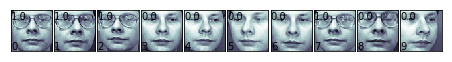

In [99]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)